In [1]:
from ase.io.trajectory import TrajectoryWriter as tw
from ase.io.trajectory import TrajectoryReader as tr

import os
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import InsetPosition
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker

from publish_format import useLargeSize

/gpfs/data/brubenst/chuang25/pythonvirtualenv/ml/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
def extract_energy(filename):
    energy = []
    trajs = tr(filename)
    for traj in trajs:
        energy.append(traj.get_potential_energy())
    return np.array(energy)


def extract_forces(filename):
    forces = []
    trajs = tr(filename)
    for traj in trajs:
        forces.append(np.linalg.norm(np.array(traj.get_forces())))
    return np.array(forces)


def extract_distance(filename, atom1, atom2):
    distances = []
    trajs = tr(filename)
    print(trajs[0].get_chemical_symbols())
    print("Get distance between atom {} and atom {}".format(atom1, atom2))
    for traj in trajs:
        distances.append(traj.get_distances(atom1, atom2))
    return np.array(distances)

In [3]:
dft_file = "./geom_opt/dft/c2_opt.traj"
forces_dft = extract_forces(dft_file)
energies_dft = extract_energy(dft_file)
distances_dft = extract_distance(dft_file, 0, 1)

amptorch_dft_force_file = "./geom_opt/amptorch_dft/force/c2_opt.traj"
forces_amptorch_dft_force = extract_forces(amptorch_dft_force_file)
energies_amptorch_dft_force = extract_energy(amptorch_dft_force_file)
distances_amptorch_dft_force = extract_distance(amptorch_dft_force_file, 0, 1)

amptorch_dft_noforce_file = "./geom_opt/amptorch_dft/noforce/c2_opt.traj"
forces_amptorch_dft_noforce = extract_forces(amptorch_dft_noforce_file)
energies_amptorch_dft_noforce = extract_energy(amptorch_dft_noforce_file)
distances_amptorch_dft_noforce = extract_distance(amptorch_dft_noforce_file, 0, 1)

amptorch_dmc_file = "./geom_opt/amptorch_dmc/c2_opt.traj"
forces_amptorch_dmc = extract_forces(amptorch_dmc_file)
energies_amptorch_dmc = extract_energy(amptorch_dmc_file)
distances_amptorch_dmc = extract_distance(amptorch_dmc_file, 0, 1)

['C', 'C']
Get distance between atom 0 and atom 1
['C', 'C']
Get distance between atom 0 and atom 1
['C', 'C']
Get distance between atom 0 and atom 1
['C', 'C']
Get distance between atom 0 and atom 1


In [25]:
print(distances_dft)
print(distances_amptorch_dft_force)
print(distances_amptorch_dft_noforce)
print(distances_amptorch_dmc)

[[2.        ]
 [1.26308211]
 [1.26164251]]
[[2.        ]
 [1.25573268]
 [1.25446107]]
[[2.        ]
 [1.24952311]
 [1.25170508]
 [1.25289743]]
[[2.        ]
 [1.23322448]
 [1.23592546]
 [1.23712676]]


/gpfs/data/brubenst/chuang25/pythonvirtualenv/ml/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


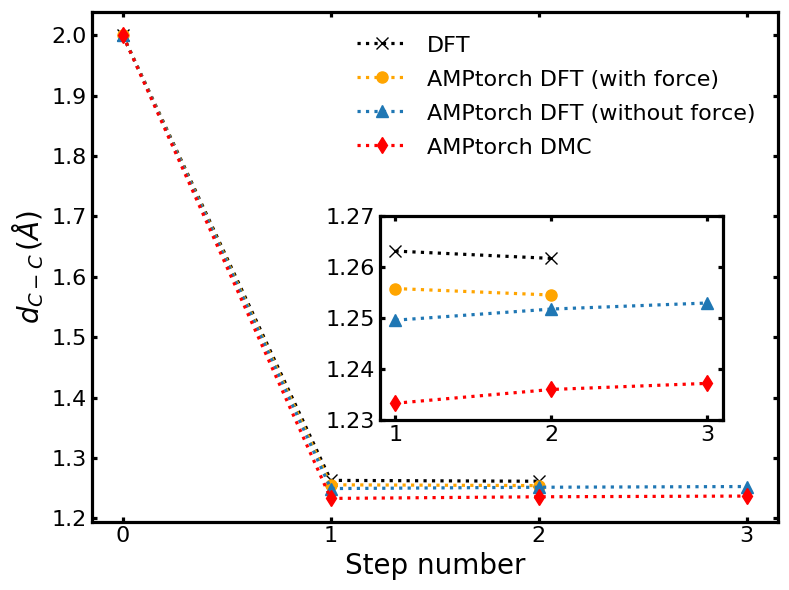

In [4]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(np.arange(len(distances_dft)), distances_dft, marker="x", linestyle="dotted", markersize=8, c="k", label="DFT")

ax.plot(np.arange(len(distances_amptorch_dft_force,)), distances_amptorch_dft_force, marker="o", linestyle="dotted", markersize=8, c="orange", label="AMPtorch DFT (with force)")

ax.plot(np.arange(len(distances_amptorch_dft_noforce)), distances_amptorch_dft_noforce, marker="^", linestyle="dotted", markersize=8, c="tab:blue", label="AMPtorch DFT (without force)")

ax.plot(np.arange(len(distances_amptorch_dmc)), distances_amptorch_dmc, marker="d", linestyle="dotted", markersize=8, c="r", label="AMPtorch DMC")

ax.set_ylabel(r"$d_{C-C}\,(\AA$)")
ax.set_xlabel(r"Step number")
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
ax.legend(loc=0, frameon=False, fontsize=18)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2 = plt.axes([0, 0, 1, 1])
ip = InsetPosition(ax, [0.42, 0.2, 0.5, 0.4])
start, end = 1,4
ax2.set_axes_locator(ip)
ax2.plot(np.arange(len(distances_dft))[start:end], distances_dft[start:end], marker="x", linestyle="dotted", markersize=8, c="k", label="DFT")
ax2.plot(np.arange(len(distances_amptorch_dft_force,))[start:end], distances_amptorch_dft_force[start:end], marker="o", linestyle="dotted", markersize=8, c="orange", label="AMPtorch DFT (with force)")
ax2.plot(np.arange(len(distances_amptorch_dft_noforce))[start:end], distances_amptorch_dft_noforce[start:end], marker="^", linestyle="dotted", markersize=8, c="tab:blue", label="AMPtorch DFT (without force)")
ax2.plot(np.arange(len(distances_amptorch_dmc))[start:end], distances_amptorch_dmc[start:end], marker="d", linestyle="dotted", markersize=8, c="r", label="AMPtorch DMC")

ax2.tick_params(axis="y")
ax2.yaxis.set_ticks_position("both")
ax2.xaxis.set_ticks_position("both")
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.set_yticks([1.23, 1.24, 1.25, 1.26, 1.27])

useLargeSize(plt, ax)
useLargeSize(plt, ax2)
plt.savefig("./figures/c2_opt_comparison.png", dpi=300)
plt.show()